# Use Case: Marketing Plan

Let's try to follow this procedure:
1. Frame the problem and look at the big picture.
1. Get the data.
1. Explore the data to gain insights.
1. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
1. Explore many different models and short-list the best ones.
1. Fine-tune your models and combine them into a great solution.
1. Present your solution.
1. Launch, monitor, and maintain your system.

## Frame the problem and look at the big picture

Questions:
* How do we frame the problem?
* What is the big picture?

**Prepare our coding setup**

In [1]:
# code starts here
# some of the tools we use
from itertools import product

from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from util import XNAMES, YNAME, COLORS
from util import plot_coefficients, generate_valid_budget_allocations, create_model_explorer, generate_budget_plans, predict_sales_and_compare_plans

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Get the data

Questions:
* How can we "get" the data?

In [2]:
!head ./marketing_use_case/Advertising.csv

head: ./marketing_use_case/Advertising.csv: No such file or directory


In [3]:
# read in the data
df = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', index_col=0)
df

TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

## Explore the data to gain insights

Questions:
* How can we explore the data?
* What kind of insights do we seek?

In [4]:
df.describe().round(0)

TV  radio  newspaper  sales
count  200.0  200.0      200.0  200.0
mean   147.0   23.0       31.0   14.0
std     86.0   15.0       22.0    5.0
min      1.0    0.0        0.0    2.0
25%     74.0   10.0       13.0   10.0
50%    150.0   23.0       26.0   13.0
75%    219.0   37.0       45.0   17.0
max    296.0   50.0      114.0   27.0

In [5]:
df.sort_values('TV', ascending=False).head()

TV  radio  newspaper  sales
102  296.4   36.3      100.9   23.8
43   293.6   27.7        1.8   20.7
31   292.9   28.3       43.2   21.4
36   290.7    4.1        8.5   12.8
99   289.7   42.3       51.2   25.4

In [6]:
df.corr().round(2)

TV  radio  newspaper  sales
TV         1.00   0.05       0.06   0.78
radio      0.05   1.00       0.35   0.58
newspaper  0.06   0.35       1.00   0.23
sales      0.78   0.58       0.23   1.00

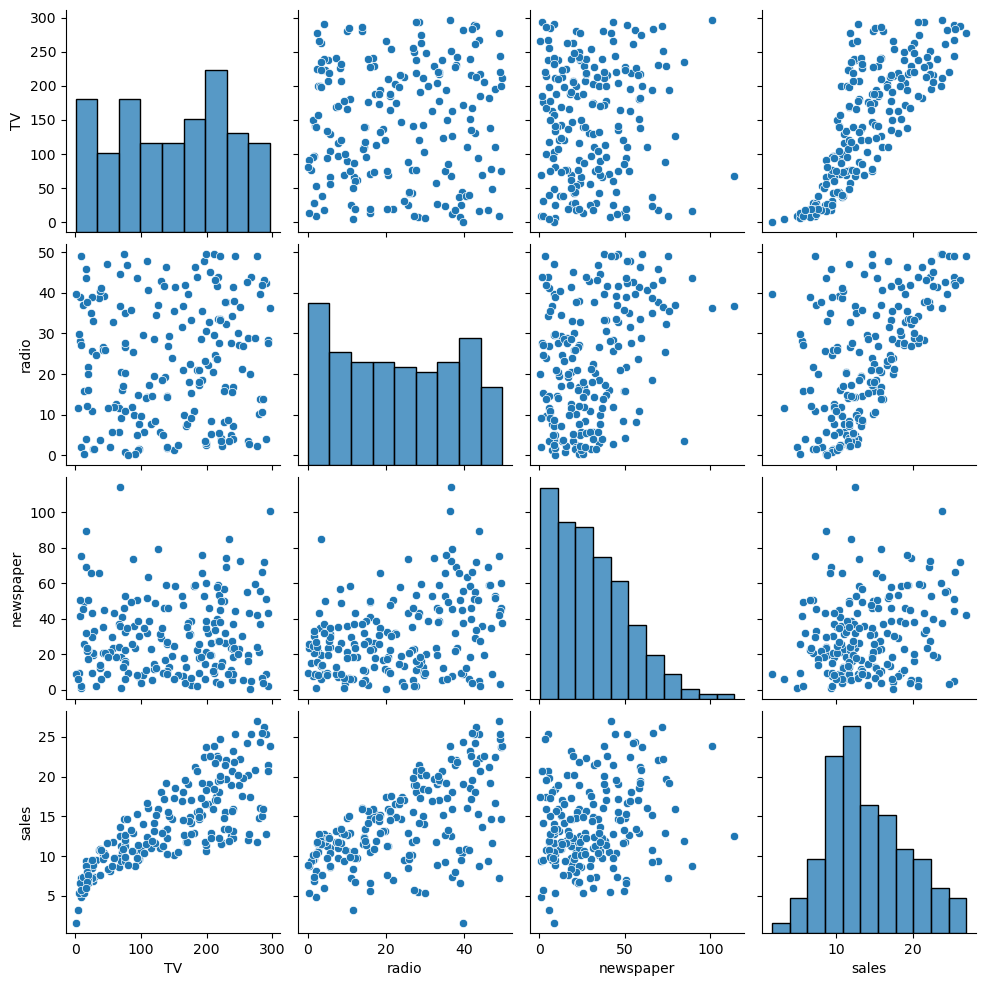

In [7]:
ag = sns.pairplot(data=df)
ag.fig

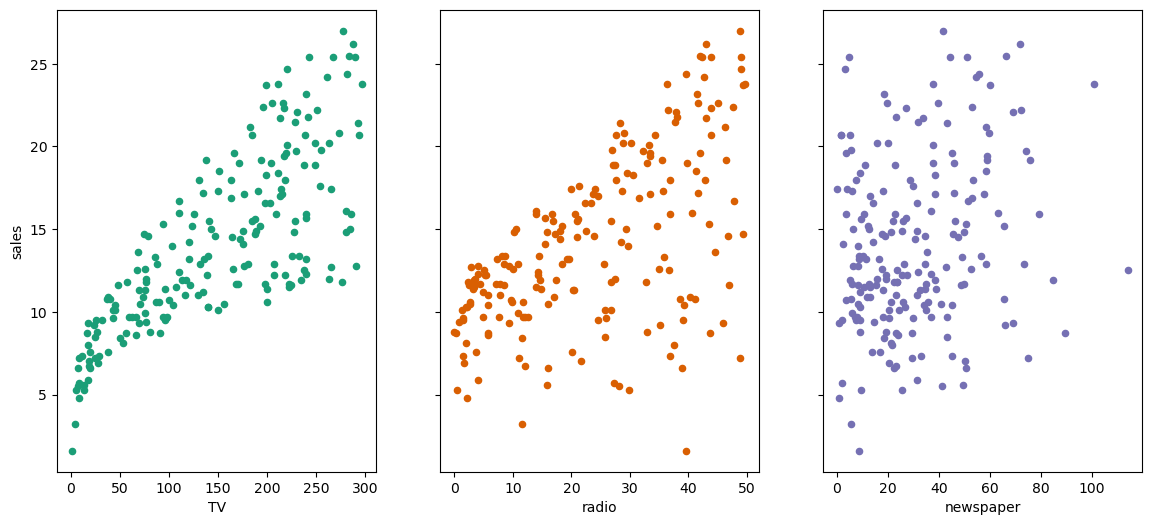

In [8]:
# more often than not, a plot gives much more insight
fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True)
for xname, ax in zip(XNAMES, axs):
    df.plot.scatter(ax=ax, x=xname, y=YNAME, color=COLORS[xname])

fig

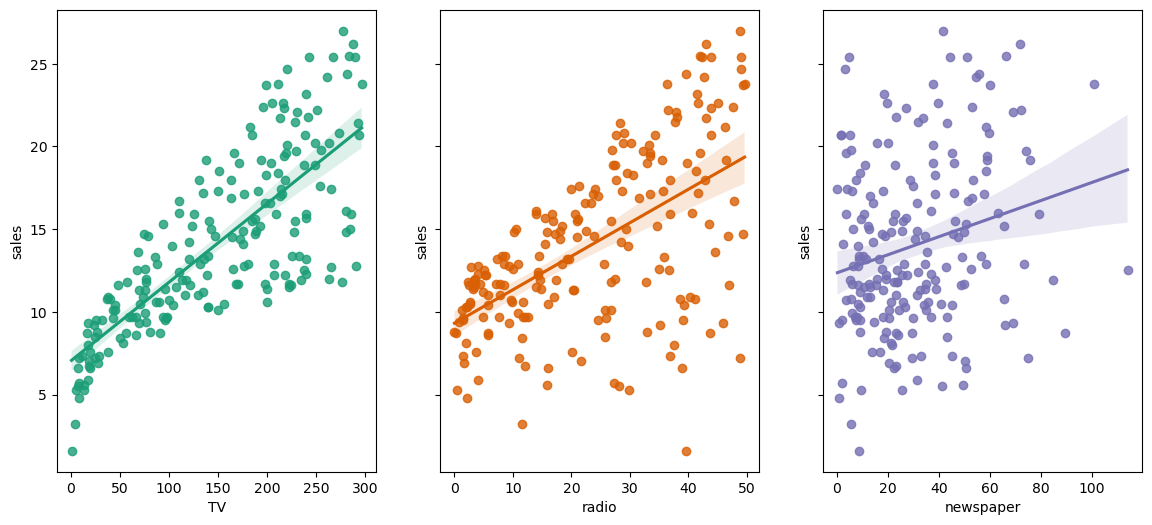

In [9]:
# seems like we have some pretty strong correlations
fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True)
for xname, ax in zip(XNAMES, axs):
    sns.regplot(data=df, x=xname, y=YNAME, ax=ax, color=COLORS[xname])

fig

### What have we learned?

Observations:
* ...

### How would you allocate resources?

Based on what we have learned so far...

## Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

In this scenario, there is nothing to prepare right now.

Questions:
* What data preparation steps can you think of in **your** use case?

## Explore many different models and short-list the best ones

Let's take it step by step and explore **one** model.

Questions:
* What are we going to do now?
* Assuming we chose a linear model, explain the model equation.
* What kind of questions do we hope to answer once we have our model?

### Recall: Learning from Data

Let's follow this process:
1. Split data into train and test
2. Chose a model and:
  - fit
  - predict
  - evaluate (score, assess, ...)
3. Discuss
4. Iterate...

### Split Data

In [10]:
from sklearn.model_selection import train_test_split

X = df[XNAMES]
y = df[YNAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Select Model

In [11]:
from sklearn.linear_model import LinearRegression  # our first machine learning model

### Fit Model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)  # that's already it

LinearRegression()

### Predict

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred[:3]

array([16.38348211, 20.92434957, 21.61495426])

### Evaluate Scores/Metrics/*

In [14]:
from sklearn.metrics import r2_score
# https://en.wikipedia.org/wiki/Coefficient_of_determination
# the closer to 1 the better

r2_score(y_test, y_test_pred)

0.8935163320163658

In [15]:
# or even easier
model.score(X_test, y_test), model.score(X_train, y_train)

(0.8935163320163658, 0.8966445527601498)

**R2 (Coefficient of Determination)**

In the case of linear regression, R2 describes how well the variance in the data can be
described using a linear model.
The closer to 1, the better.

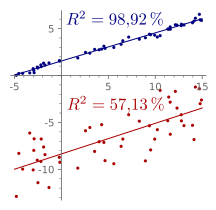

In [16]:
%%svg
https://upload.wikimedia.org/wikipedia/commons/4/4a/R2values.svg

**Visualize (Actual vs Prediction)**

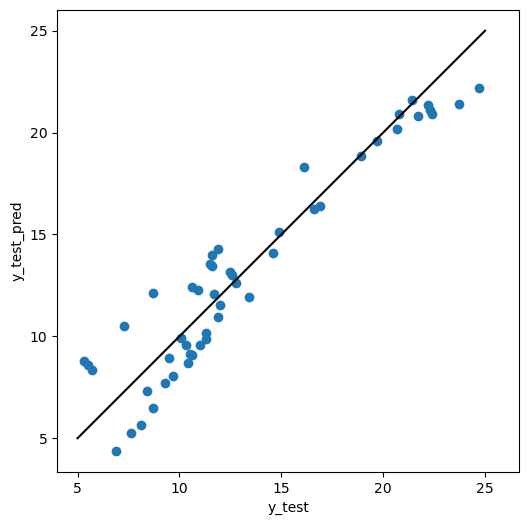

In [17]:
# or plot actual vs. prediction
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, y_test_pred)
ax.plot([5, 25], [5, 25], color='black')
ax.axis('square')
ax.set_xlabel('y_test')
ax.set_ylabel('y_test_pred')
fig

**Visualize (Residuals = Actual - Pred)**

In [18]:
df_test = X_test.assign(sales=y_test, sales_pred=y_test_pred)
df_test['actual-pred'] = df_test['sales'] - df_test['sales_pred']

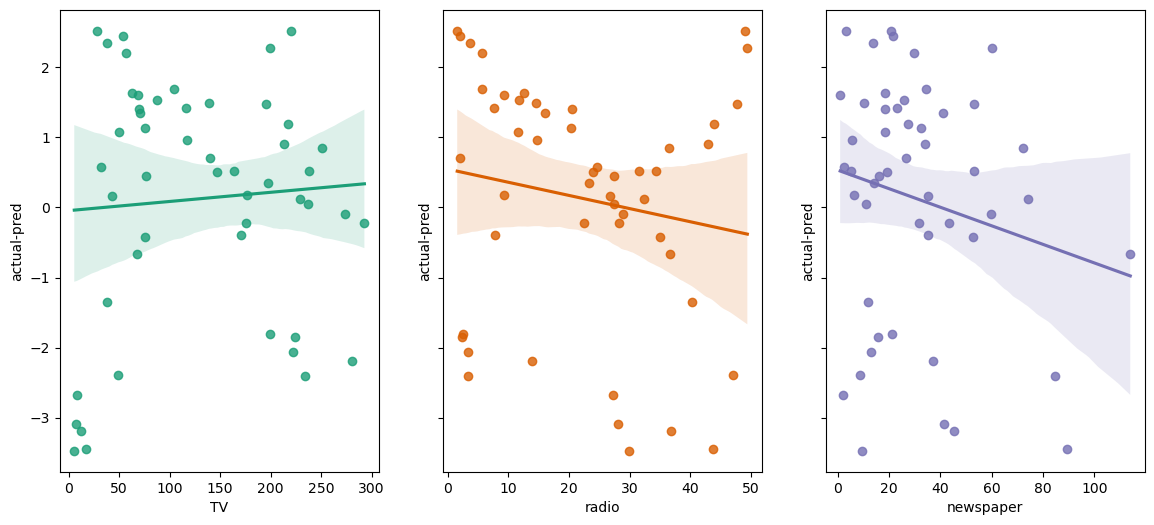

In [19]:
fig, axs = plt.subplots(figsize=(14, 6), ncols=3, sharey=True)

for xname, ax in zip(XNAMES, axs):
    sns.regplot(data=df_test, x=xname, y='actual-pred' , color=COLORS[xname], ax=ax)

fig

## Fine-tune your models and combine them into a great solution.

Let's take it step by step and see how our model from above can contribute to a solution.

Questions:
* What are we going to do now?

### Q&A: Investment in which channel is most valuable?

We can take a look at the model coefficients. The larger the absolute value of the coefficient, the more important the contributing factor.

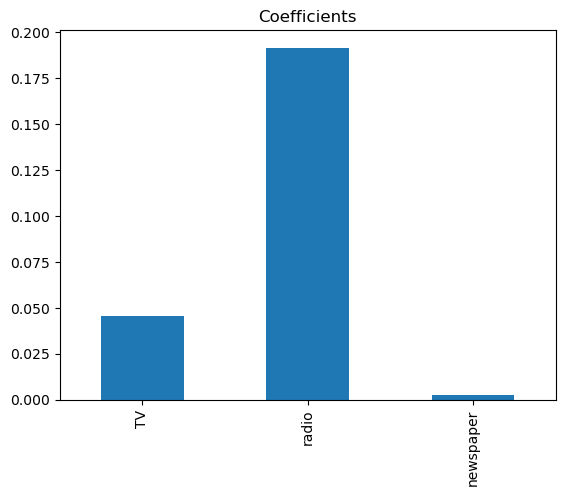

In [20]:
plot_coefficients(model.coef_, XNAMES)

In [21]:
explorer = interact(create_model_explorer(df_test, model), 
                    tv_budget=(0, 300), 
                    radio_budget=(0, 50),
                    newspaper_budget=(0, 100))
explorer

interactive(children=(IntSlider(value=140, description='tv_budget', max=300), IntSlider(value=20, description=…

<function util.create_model_explorer.<locals>.explore_budget_plan(tv_budget=140, radio_budget=20, newspaper_budget=30)>

### Q&A: How to optimally distribute additional resources?

Procedure:
1. Compute a range of different budget plans.
1. Make a prediction of each budget plan.
1. Assess the result.
1. Pick the plan with the largest increase in sales.

In [22]:
total_extra_budget = 20
extra_budget_allocations = generate_valid_budget_allocations(total_extra_budget)
extra_budget_allocations.sample(n=5)

TV  radio  newspaper
21   4      0         16
10   0     20          0
41   8      6          6
30   6      0         14
19   2     16          2

**Status Quo**

In [23]:
status_quo = df.mean(axis=0).to_frame().T
status_quo  # this is where we are on average (budget-wise)

TV   radio  newspaper    sales
0  147.0425  23.264     30.554  14.0225

**Possible Budget Plans**

In [24]:
possible_budget_plans = generate_budget_plans(status_quo, extra_budget_allocations)
possible_budget_plans

TV   radio  newspaper
0   147.0425  23.264     50.554
1   147.0425  25.264     48.554
2   147.0425  27.264     46.554
3   147.0425  29.264     44.554
4   147.0425  31.264     42.554
..       ...     ...        ...
61  163.0425  25.264     32.554
62  163.0425  27.264     30.554
63  165.0425  23.264     32.554
64  165.0425  25.264     30.554
65  167.0425  23.264     30.554

[66 rows x 3 columns]

**Assessment**

Compute impact of different budget plans on sales.

In [25]:
absolute_difference, relative_difference = predict_sales_and_compare_plans(model, status_quo, possible_budget_plans)
absolute_difference.head()

TV  radio  newspaper  predicted_sales
10  0.0   20.0        0.0         3.798109
20  2.0   18.0        0.0         3.506063
9   0.0   18.0        2.0         3.420332
29  4.0   16.0        0.0         3.214017
19  2.0   16.0        2.0         3.128286

In [26]:
relative_difference.head().style.format('{:.0%}')

**Decision**

Spend the entire additional budget on radio.

## Present your solution.

*Skipped.*

## Launch, monitor, and maintain your system.

*Skipped.*

Questions:
* What does "monitor" mean?
* What does "maintain" mean?

# Stepping Back

We learned something.

That's great!

Did we learn the *right* thing?

# Revision

Questions:
* What do you think?
* Do you have any critisism?